In [3]:
# !pip install scikit-learn

  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [4]:
# !pip install pandas

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)


In [5]:
# !pip install numpy

In [6]:
#!pip install matplotlib

In [8]:
# !pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [9]:
# !pip install wordcloud

In [4]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from wordcloud import WordCloud


train_data = pd.read_csv("./twitter_training.csv")
valid_data = pd.read_csv("./twitter_validation.csv") 

train_head = train_data.head()
validation_head = valid_data.head()

train_head, validation_head

(   2401  Borderlands  Positive  \
 0  2401  Borderlands  Positive   
 1  2401  Borderlands  Positive   
 2  2401  Borderlands  Positive   
 3  2401  Borderlands  Positive   
 4  2401  Borderlands  Positive   
 
   im getting on borderlands and i will murder you all ,  
 0  I am coming to the borders and I will kill you...     
 1  im getting on borderlands and i will kill you ...     
 2  im coming on borderlands and i will murder you...     
 3  im getting on borderlands 2 and i will murder ...     
 4  im getting into borderlands and i can murder y...     ,
    3364   Facebook Irrelevant  \
 0   352     Amazon    Neutral   
 1  8312  Microsoft   Negative   
 2  4371      CS-GO   Negative   
 3  4433     Google    Neutral   
 4  6273       FIFA   Negative   
 
   I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy,

In [5]:
null_train = train_data.isnull().sum()
null_valid = valid_data.isnull().sum()

duplicates_train = train_data.duplicated().sum()
duplicates_validation = valid_data.duplicated().sum()

null_train, null_valid, duplicates_train, duplicates_validation

(2401                                                       0
 Borderlands                                                0
 Positive                                                   0
 im getting on borderlands and i will murder you all ,    686
 dtype: int64,
 3364                                                                                                                                                                                                                                                  0
 Facebook                                                                                                                                                                                                                                              0
 Irrelevant                                                                                                                                                                                                                                    

In [6]:
# 중복되는 행 제거
train_data_cleaned = train_data.drop_duplicates()

# 누락된 값 행 삭제
train_data_cleaned = train_data_cleaned.dropna(subset=[train_data.columns[3]])

remaining_duplicates_train = train_data_cleaned.duplicated().sum()
remaining_missing_train = train_data_cleaned.isnull().sum()

remaining_duplicates_train, remaining_missing_train

(np.int64(0),
 2401                                                     0
 Borderlands                                              0
 Positive                                                 0
 im getting on borderlands and i will murder you all ,    0
 dtype: int64)

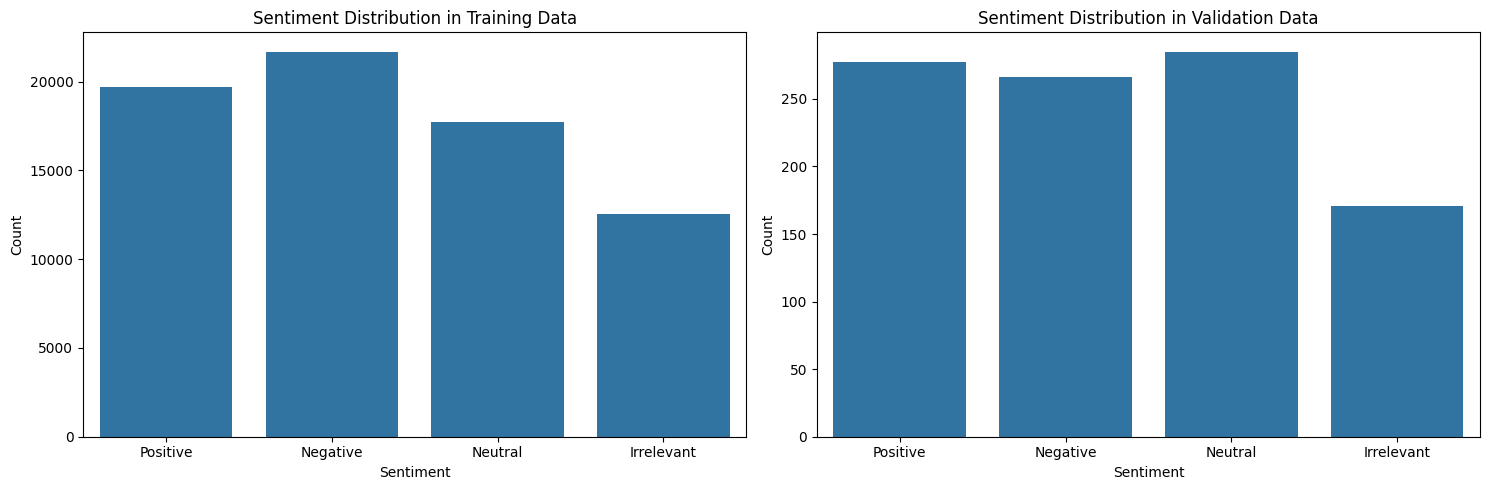

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(data=train_data_cleaned, x=train_data_cleaned.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[0])
ax[0].set_title('Sentiment Distribution in Training Data')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Sentiment')

sns.countplot(data=valid_data, x=valid_data.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[1])
ax[1].set_title('Sentiment Distribution in Validation Data')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Sentiment')

plt.tight_layout()
plt.show()

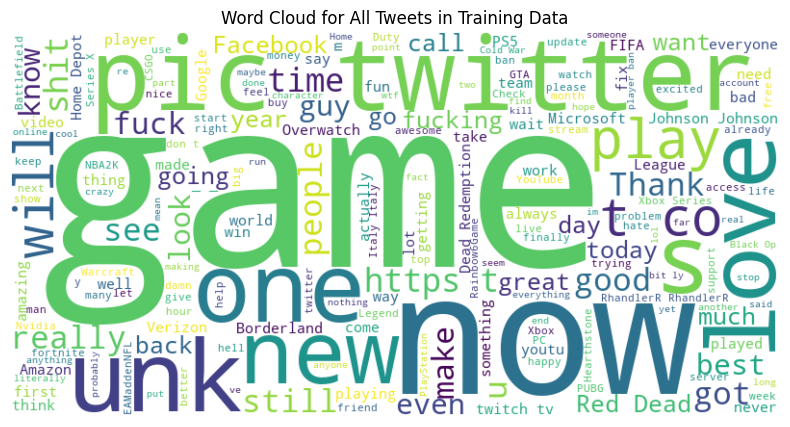

In [8]:
all_text = " ".join(tweet for tweet in train_data_cleaned[train_data_cleaned.columns[3]])
wordcloud_all = WordCloud(background_color='white', width=800, height=400).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Tweets in Training Data')
plt.show()

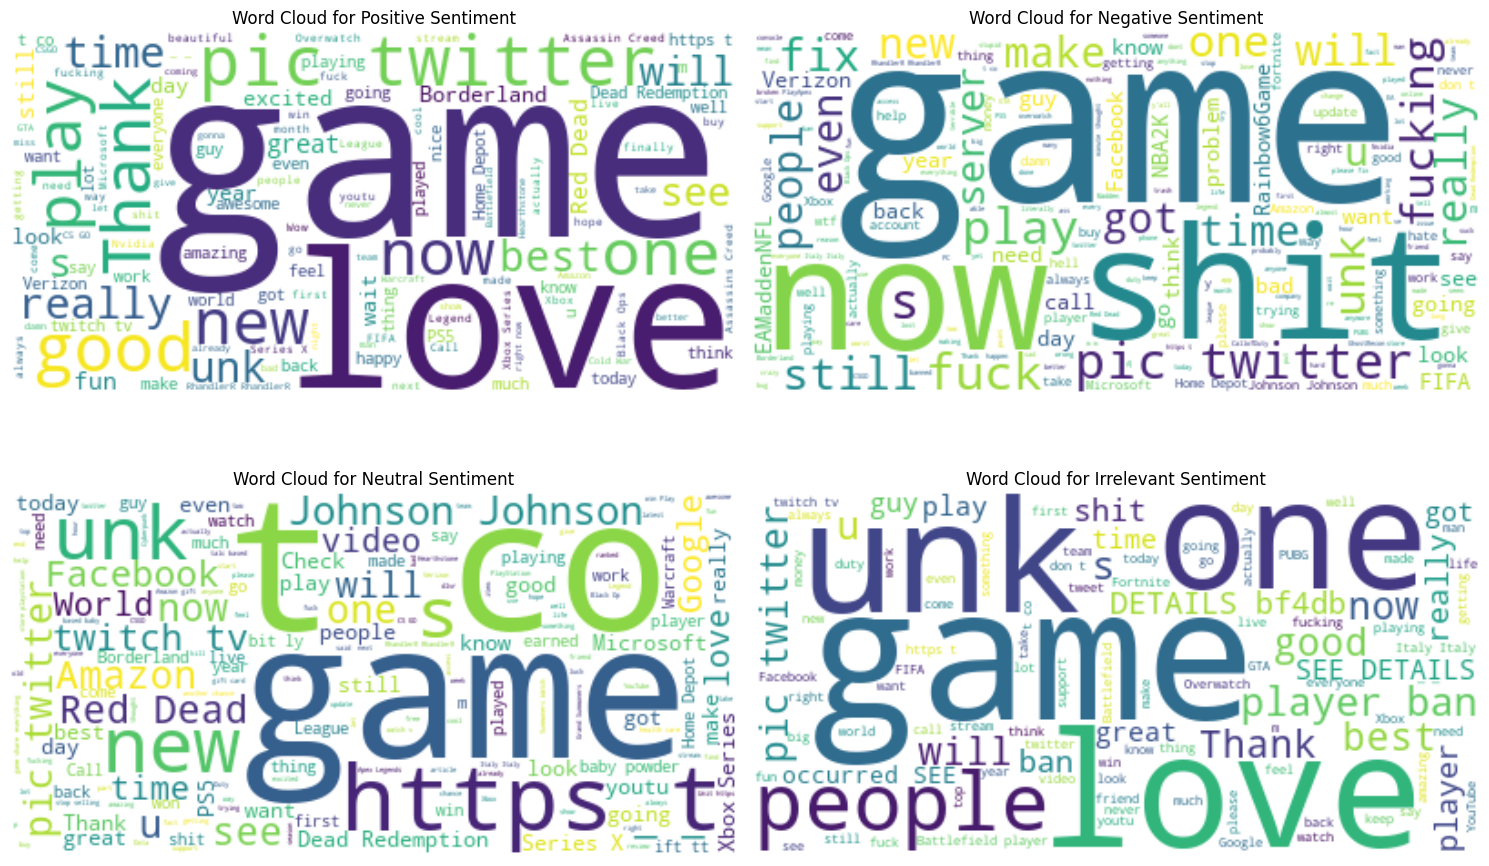

In [9]:
sentiments = ['Positive', 'Negative', 'Neutral', 'Irrelevant']

# Set up the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Generate and plot word clouds for each sentiment
for sentiment, ax in zip(sentiments, axs.ravel()):
    sentiment_text = " ".join(tweet for tweet in train_data_cleaned[train_data_cleaned[train_data_cleaned.columns[2]] == sentiment][train_data_cleaned.columns[3]])
    wordcloud_sentiment = WordCloud(background_color='white', width=400, height=200).generate(sentiment_text)
    
    ax.imshow(wordcloud_sentiment, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud for {sentiment} Sentiment')

plt.tight_layout()
plt.show()

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

def preprocess_text_simplified(text):
    # 소문자로 변환
    text = text.lower()
    # 분할을 통한 간단한 토큰화
    tokens = text.split()
    # 특수 문자 및 숫자 제거
    tokens = [token for token in tokens if token.isalpha()]
    return " ".join(tokens)

# 학습 데이터에 단순화된 전처리 적용
train_data_cleaned['processed_message_simplified'] = train_data_cleaned[train_data_cleaned.columns[3]].apply(preprocess_text_simplified)

# 단순화된 전처리를 통해 CountVectorizer를 사용하여 가장 자주 사용되는 용어 추출
vectorizer_simplified = CountVectorizer(max_features=20)
X_simplified = vectorizer_simplified.fit_transform(train_data_cleaned['processed_message_simplified'])
frequent_terms_simplified = vectorizer_simplified.get_feature_names_out()

frequent_terms_simplified

array(['and', 'but', 'for', 'game', 'have', 'in', 'is', 'it', 'just',
       'my', 'not', 'of', 'on', 'so', 'that', 'the', 'this', 'to', 'with',
       'you'], dtype=object)

In [11]:
# 2-gram을 추출하는 CountVectorizer
vectorizer_2gram = CountVectorizer(ngram_range=(2, 2), max_features=20)
X_2gram = vectorizer_2gram.fit_transform(train_data_cleaned['processed_message_simplified'])
frequent_2grams = vectorizer_2gram.get_feature_names_out()

frequent_2grams

array(['and the', 'at the', 'dead redemption', 'for the', 'if you',
       'in the', 'is the', 'johnson johnson', 'of the', 'on the',
       'red dead', 'the best', 'the game', 'this is', 'to be', 'to get',
       'to play', 'to see', 'to the', 'with the'], dtype=object)

In [12]:
vectorizer_3gram = CountVectorizer(ngram_range=(3, 3), max_features=20)
X_3gram = vectorizer_3gram.fit_transform(train_data_cleaned['processed_message_simplified'])
frequent_3grams = vectorizer_3gram.get_feature_names_out()

frequent_3grams

array(['access to health', 'at the same', 'black ops cold',
       'call of duty', 'do not have', 'for battlefield player',
       'has occurred see', 'have access to', 'league of legends',
       'most of them', 'not have access', 'of them do', 'one of the',
       'red dead redemption', 'rhandlerr rhandlerr rhandlerr',
       'thank you for', 'the fact that', 'the first time', 'them do not',
       'world of warcraft'], dtype=object)

In [13]:
from sklearn.model_selection import train_test_split

# X는 전처리된 텍스트, y는 감정 레이블 (2번째 열)
X = train_data_cleaned['processed_message_simplified']
y = train_data_cleaned[train_data_cleaned.columns[2]]

# 학습 데이터와 검증 데이터를 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # 최대 5000개의 특징을 사용
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test_tfidf)

Accuracy: 0.6539
              precision    recall  f1-score   support

  Irrelevant       0.64      0.47      0.55      2455
    Negative       0.70      0.76      0.73      4433
     Neutral       0.60      0.61      0.61      3532
    Positive       0.65      0.69      0.67      3911

    accuracy                           0.65     14331
   macro avg       0.65      0.63      0.64     14331
weighted avg       0.65      0.65      0.65     14331



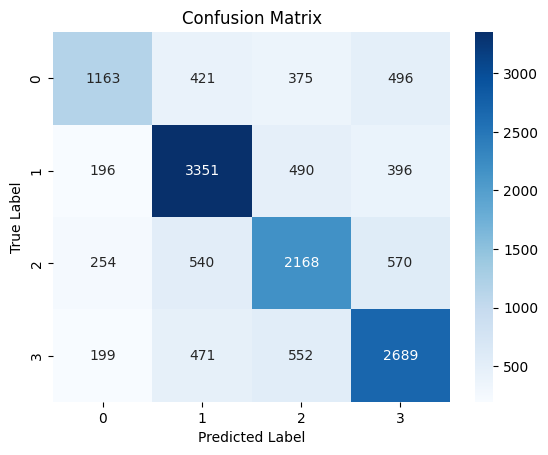

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 정확도 확인
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 분류 보고서 출력
print(classification_report(y_test, y_pred))

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [17]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {'C': [0.1, 1, 10, 100]}

# 그리드 서치
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

# 최적의 하이퍼파라미터 확인
print(f'Best Params: {grid_search.best_params_}')


Best Params: {'C': 100}


In [18]:
# 최적의 모델
best_model = grid_search.best_estimator_

# 새로운 트윗 데이터
new_tweets = ["I love the new feature of this product!", 
              "This is the worst service ever.", 
              "I'm not sure how I feel about this."]

# 새로운 트윗을 TF-IDF 벡터화
new_tweets_tfidf = tfidf_vectorizer.transform(new_tweets)

# 예측 수행
predicted_sentiments = best_model.predict(new_tweets_tfidf)

# 예측 결과 출력
for tweet, sentiment in zip(new_tweets, predicted_sentiments):
    print(f'Tweet: "{tweet}" -> Predicted Sentiment: {sentiment}')

Tweet: "I love the new feature of this product!" -> Predicted Sentiment: Positive
Tweet: "This is the worst service ever." -> Predicted Sentiment: Negative
Tweet: "I'm not sure how I feel about this." -> Predicted Sentiment: Negative
